## Logistic Regression Boundary

The goal of this exercise it to plot the decision boundaries. We shall look at the petal length and width in the data.
Use that to create a soft-max Logitic Model.

We shall use the model to run predictions and probabilities for every point in the graph.
We shall look at the all the combination of lengths from 0=>8 and width (0=>3.5). Plot the predicted
species and probabilities. 

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
labels = iris.target_names
features = iris.feature_names

In [3]:
print(f"Labels: {labels}")
print(f"Fatures: {features}")

Labels: ['setosa' 'versicolor' 'virginica']
Fatures: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Petal Length and Width

In [4]:
setosa_petal_length = X[y == 0][:, 2]
setosa_petal_width = X[y == 0][:, 3]
versicolor_petal_length = X[y == 1][:, 2]
versicolor_petal_width = X[y == 1][:, 3]
virginica_petal_length = X[y == 2][:, 2]
virginica_petal_width = X[y == 2][:, 3]

In [5]:
# Create a 200x500 grid of points to plot decision boundary
# Basically, we create a grid of points all over the space
# We will use this grid to plot the prediction of the model
# and plot the probability of the model and thus the decision boundary
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)
X_p = iris.data[:, (2, 3)] # 'petal length (cm)', 'petal width (cm)'
# multi_class='multinomial' is default
soft_max_model = LogisticRegression(solver='lbfgs', C=10).fit(X_p, y)
# Plot the decision boundary
# zz1 = y_proba[:, 1].reshape(x0.shape)
probs = soft_max_model.predict_proba(np.c_[x0.ravel(), x1.ravel()])[:, 1].reshape(x0.shape)
species = soft_max_model.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)

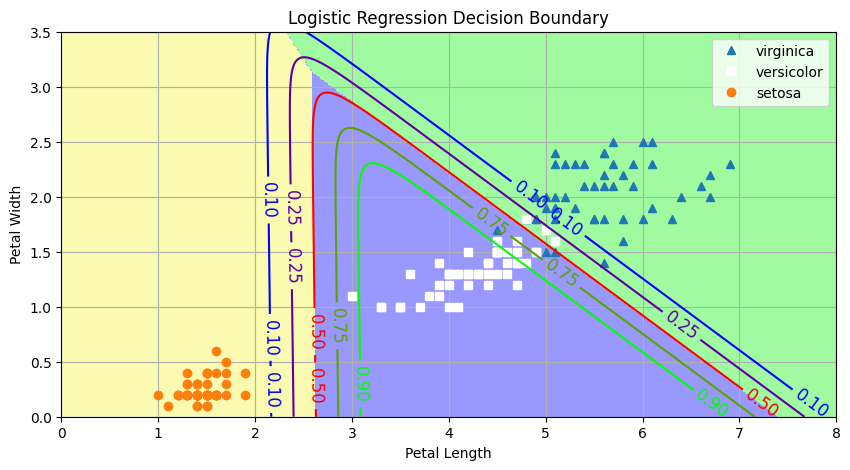

In [6]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

# Draw scatterplot of setosa_petal_length, setosa_petal_width
fig = plt.figure(figsize=(10, 5))
plt.plot(virginica_petal_length, virginica_petal_width, '^', label='virginica')
plt.plot(versicolor_petal_length, versicolor_petal_width, 'ws', label='versicolor')
plt.plot(setosa_petal_length, setosa_petal_width, 'o', label='setosa')

# Plot the color for each species identified for 500x200=100K points on map
plt.contourf(x0, x1, species, cmap=custom_cmap)
# Plot the contour for each species identified for 500x200=100K points on map
contour = plt.contour(x0, x1, probs, levels=[0.1, 0.25, 0.5, 0.75, 0.9], cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Logistic Regression Decision Boundary')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
# Note that SVM "linear" kernel will produce the same result as Logistic Regression
svm_model = SVC(kernel='rbf', C=10, gamma='auto', tol=0.00001, break_ties=True, probability=True).fit(X_p, y)

probs = svm_model.predict_proba(np.c_[x0.ravel(), x1.ravel()])[:, 1].reshape(x0.shape)
species = svm_model.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)

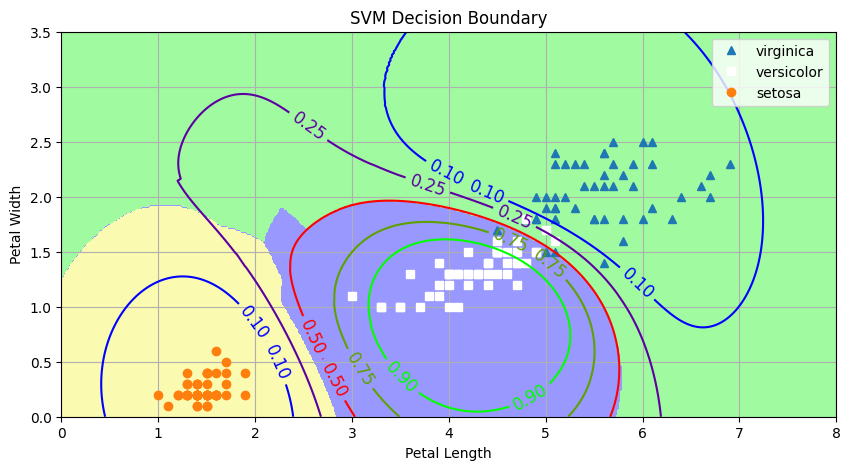

In [8]:
# Draw scatterplot of setosa_petal_length, setosa_petal_width
fig = plt.figure(figsize=(10, 5))
plt.plot(virginica_petal_length, virginica_petal_width, '^', label='virginica')
plt.plot(versicolor_petal_length, versicolor_petal_width,
         'ws', label='versicolor')
plt.plot(setosa_petal_length, setosa_petal_width, 'o', label='setosa')

# Plot the color for each species identified for 500x200=100K points on map
plt.contourf(x0, x1, species, cmap=custom_cmap)
# Plot the contour for each species identified for 500x200=100K points on map
contour = plt.contour(x0, x1, probs, levels=[
                      0.1, 0.25, 0.5, 0.75, 0.9], cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('SVM Decision Boundary')
plt.grid(True)
plt.legend()
plt.show()

### Sepal Length and Width

- Setosa is a separate cluster
- Versiclor and virginia are overlapping observations

In [9]:
setosa_sepal_length = X[y == 0][:,0]
setosa_sepal_width = X[y == 0][:,1]
virginica_sepal_length = X[y == 2][:,0]
virginica_sepal_width = X[y == 2][:,1]
versicolor_sepal_length = X[y == 1][:,0]
versicolor_sepal_width = X[y == 1][:,1]

x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 4.5, 250).reshape(-1, 1),
)

X_p = iris.data[:, (0, 1)]  # 'sepal length (cm)', 'sepal width (cm)'
# multi_class='multinomial' is default
soft_max_model = LogisticRegression(solver='lbfgs', C=10).fit(X_p, y)
# Plot the decision boundary
# zz1 = y_proba[:, 1].reshape(x0.shape)
probs = soft_max_model.predict_proba(np.c_[x0.ravel(), x1.ravel()])[
    :, 1].reshape(x0.shape)
species = soft_max_model.predict(
    np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)

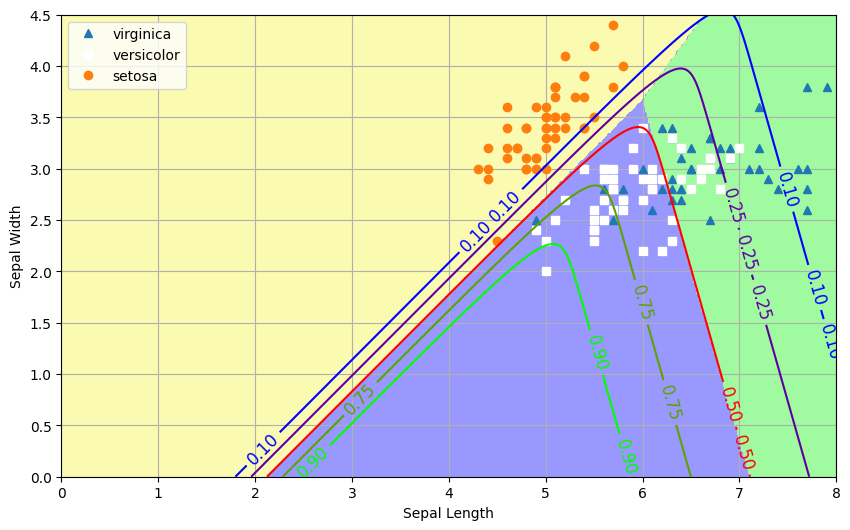

In [10]:

fig = plt.figure(figsize=(10, 6))
# Plot scatterplot of x_axis, setosa_sepal_length
# Show setosa as ^ and versicolor as o
# Draw scatterplot of setosa_petal_length, setosa_petal_width
plt.plot(virginica_sepal_length, virginica_sepal_width, '^', label='virginica')
plt.plot(versicolor_sepal_length,
         versicolor_sepal_width, 'ws', label='versicolor')
plt.plot(setosa_sepal_length, setosa_sepal_width, 'o', label='setosa')

# Plot the color for each species identified for 500x200=100K points on map
plt.contourf(x0, x1, species, cmap=custom_cmap)
# Plot the contour for each species identified for 500x200=100K points on map
contour = plt.contour(x0, x1, probs, levels=[
                      0.1, 0.25, 0.5, 0.75, 0.9], cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid(True)
plt.legend()
plt.show()

### Sepal Length vs Petal Length

In [11]:
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 8, 500).reshape(-1, 1),
)

X_p = iris.data[:, (0, 2)]  # 'sepal length (cm)', 'petal lenth (cm)'
# multi_class='multinomial' is default
soft_max_model = LogisticRegression(solver='lbfgs', C=10).fit(X_p, y)
# Plot the decision boundary
# zz1 = y_proba[:, 1].reshape(x0.shape)
probs = soft_max_model.predict_proba(np.c_[x0.ravel(), x1.ravel()])[
    :, 1].reshape(x0.shape)
species = soft_max_model.predict(
    np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)

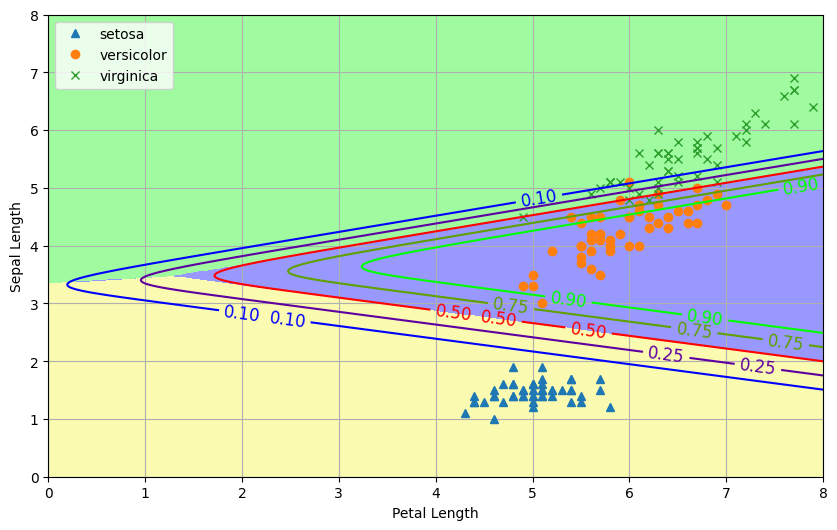

In [12]:
# Show Sepal lenght with petal length
fig = plt.figure(figsize=(10,6))
plt.plot(setosa_sepal_length, setosa_petal_length, '^', label='setosa')
plt.plot(versicolor_sepal_length, versicolor_petal_length, 'o', label='versicolor')
plt.plot(virginica_sepal_length, virginica_petal_length, 'x', label='virginica')
# Plot the color for each species identified for 500x200=100K points on map
plt.contourf(x0, x1, species, cmap=custom_cmap)
# Plot the contour for each species identified for 500x200=100K points on map
contour = plt.contour(x0, x1, probs, levels=[
                      0.1, 0.25, 0.5, 0.75, 0.9], cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

plt.clabel(contour, inline=1, fontsize=12)

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend()
plt.grid(True)
plt.show()